# Exercise 6 Solution: Hypothesis Significance Testing

In this exercise, we explore key methods of Null Hypothesis Significance Testing (NHST) that allow us to make data-driven decisions about experimental findings in neuroscience. These methods help determine whether observed patterns—such as increased firing rates, classification accuracies, or EEG amplitudes—are statistically significant or could have occurred by random chance.

Specifically, we will:

1. **Hypothesis Testing:** Learn the general framework of statistical hypothesis testing, where we begin by assuming a null hypothesis (e.g., no effect or difference) and evaluate whether the observed data provides sufficient evidence to reject it. This approach underpins all scientific inference in neuroscience, from ERP studies to behavioral outcomes.

2. **Binomial Test:** Learn how to evaluate whether binary outcomes (e.g., a BCI system correctly classifying MI trials) deviate significantly from chance-level performance. This is particularly important when assessing accuracy in two-alternative tasks such as ERP detection or behavioral decision-making.

3. **t-test:** Use the t-test to compare means between two conditions (e.g., average alpha power pre- vs. post-stimulation, or firing rate in left vs. right movement trials). This test accounts for sample size and variance, and is crucial when working with small sample datasets typical in cognitive and clinical neuroscience.

4. **Directional vs. A-directional Hypotheses:** Understand the difference between one-tailed and two-tailed tests. Neuroscience research often requires careful selection of the hypothesis direction—e.g., are we testing whether an intervention increases firing rate, or just that it changes it?

5. **p-values and Statistical Significance:** Gain insight into how p-values quantify the probability of observing data at least as extreme as ours, under the assumption that the null hypothesis is true. We'll show how to compute and interpret p-values for real neuroscience scenarios.

6. **Type I and Type II Errors:** Explore the implications of false positives (detecting an effect that isn’t real) and false negatives (failing to detect a true effect), especially in critical applications like clinical diagnosis, brain stimulation protocols, or neurofeedback training.


By the end of this exercise, you'll gain an understanding of how to apply hypothesis testing—including binomial tests, t-tests, and directional versus a-directional hypotheses—to neuroscience data, and how to interpret results while accounting for statistical significance, uncertainty, and the risks of Type I and Type II errors.


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
from scipy.stats import ttest_1samp, binom_test, ttest_rel


## Example 1: Hypothesis Testing

In [2]:
# Simulated decoding accuracies after the update (in %)
decoding_accuracies = np.array([72, 74, 69, 71, 70, 68, 73, 75, 67, 72,
                                 70, 71, 69, 68, 70, 72, 71, 70, 73, 74,
                                 68, 69, 70, 72, 71, 73, 75, 74, 70, 71])

# Null hypothesis mean (prior belief)
mu_0 = 70

# Perform one-sample t-test
t_stat, p_value = ttest_1samp(decoding_accuracies, mu_0)

print("T-statistic:", round(t_stat, 3))
print("P-value:", round(p_value, 4))

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject H₀: The decoder's accuracy significantly changed after the update.")
else:
    print("Fail to reject H₀: No significant change in decoder's accuracy.")


T-statistic: 2.699
P-value: 0.0115
Reject H₀: The decoder's accuracy significantly changed after the update.


## Example 2: Binomial Testing

In [3]:
# a.
# Given values
successes = 17       # number of correct classifications
trials = 25          # total number of trials
chance_level = 0.5   # probability of success under the null hypothesis


In [6]:
# Perform one-tailed binomial test (greater than chance)
p_value = binom_test(successes, trials, chance_level, alternative='greater')

print(f"Number of correct classifications: {successes}/{trials}")
print(f"P-value (one-tailed test): {p_value:.4f}")


Number of correct classifications: 17/25
P-value (one-tailed test): 0.0539


C:\Users\yoav1\AppData\Local\Temp\ipykernel_10524\4137894706.py:2: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  p_value = binom_test(successes, trials, chance_level, alternative='greater')


In [7]:
# Interpret result
alpha = 0.05
if p_value < alpha:
    print("Result: Statistically significant. The BCI performs better than chance.")
else:
    print("Result: Not statistically significant. No strong evidence that BCI performs better than chance.")

Result: Not statistically significant. No strong evidence that BCI performs better than chance.


In [8]:
# b.
# Updated values
successes = 20       # number of correct classifications
trials = 25          # total number of trials
chance_level = 0.5   # probability of success under the null hypothesis

In [9]:
# Perform one-tailed binomial test (greater than chance)
p_value = binom_test(successes, trials, chance_level, alternative='greater')

print(f"Number of correct classifications: {successes}/{trials}")
print(f"P-value (one-tailed test): {p_value:.4f}")


Number of correct classifications: 20/25
P-value (one-tailed test): 0.0020


C:\Users\yoav1\AppData\Local\Temp\ipykernel_10524\4137894706.py:2: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  p_value = binom_test(successes, trials, chance_level, alternative='greater')


In [10]:
# Interpret result
alpha = 0.05
if p_value < alpha:
    print("Result: Statistically significant. The BCI performs better than chance.")
else:
    print("Result: Not statistically significant. No strong evidence that BCI performs better than chance.")

Result: Statistically significant. The BCI performs better than chance.


## Example 3: t-test

In [11]:
# Simulated beta power values (replace with actual data if available)
beta_power_before = np.array([10.2, 9.8, 10.5, 10.1, 9.9, 10.3, 10.0, 10.4, 10.1, 9.7, 10.2, 10.0])
beta_power_after  = np.array([10.9, 10.4, 11.0, 10.7, 10.6, 11.2, 10.8, 10.9, 10.7, 10.5, 10.9, 11.1])


In [14]:
# Perform paired t-test
t_stat, p_value = ttest_rel(beta_power_after, beta_power_before)

print(f"Paired t-test results:")
print(f"t-statistic = {t_stat:.3f}")
print(f"p-value = {p_value:.4f}")



Paired t-test results:
t-statistic = 14.185
p-value = 0.0000


In [15]:
# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Result: Statistically significant. The stimulus had a significant effect on beta power.")
else:
    print("Result: Not statistically significant. No strong evidence that the stimulus affected beta power.")

Result: Statistically significant. The stimulus had a significant effect on beta power.


To determine whether the stimulus had a significant effect on beta power, a paired t-test (also known as a dependent samples t-test) was used.
This test is appropriate because the measurements before and after the stimulus are taken from the same set of trials,
making the data paired or dependent. The paired t-test accounts for the within-subject variability and assesses whether
the mean difference between the two conditions is statistically significant.

## Example 4: Directional vs A-directional Hypotheses

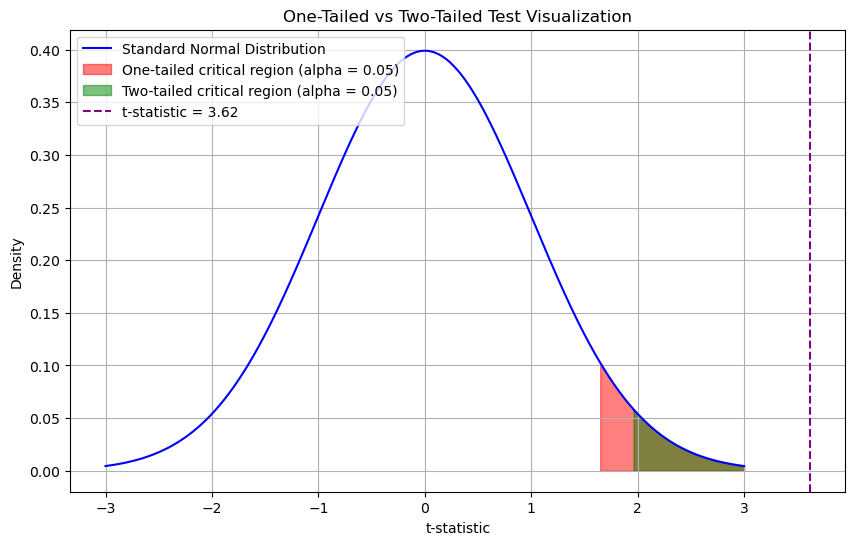

Two-tailed p-value: 0.0056
One-tailed p-value: 0.0028


In [16]:
# Simulate some data for alpha power before and after stimulus
np.random.seed(42)
alpha_before = np.random.normal(9.2, 0.2, 10)  # baseline alpha power
alpha_after = np.random.normal(9.7, 0.2, 10)   # post-stimulus alpha power

# Calculate the difference (after - before)
difference = alpha_after - alpha_before

# Perform one-tailed and two-tailed t-tests
t_stat, p_value_two_tailed = ttest_1samp(difference, 0)
p_value_one_tailed = p_value_two_tailed / 2 if t_stat > 0 else 1

# Plotting
x = np.linspace(-3, 3, 1000)
y = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x**2)  # Standard normal distribution (t-distribution approximation for large samples)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Standard Normal Distribution", color="blue")

# Mark the critical regions for one-tailed and two-tailed tests
plt.fill_between(x, 0, y, where=(x > 1.645), color='red', alpha=0.5, label="One-tailed critical region (alpha = 0.05)")
plt.fill_between(x, 0, y, where=(x > 1.96), color='green', alpha=0.5, label="Two-tailed critical region (alpha = 0.05)")

# Plot the t-statistic and the rejection regions
plt.axvline(x=t_stat, color='purple', linestyle='--', label=f"t-statistic = {t_stat:.2f}")

# Add labels and title
plt.title("One-Tailed vs Two-Tailed Test Visualization")
plt.xlabel("t-statistic")
plt.ylabel("Density")
plt.legend(loc="upper left")

# Show the plot
plt.grid(True)
plt.show()

# Print p-values
print(f"Two-tailed p-value: {p_value_two_tailed:.4f}")
print(f"One-tailed p-value: {p_value_one_tailed:.4f}")


In hypothesis testing, a **one-tailed test** evaluates if the t-statistic falls in the red region, indicating a specific direction (e.g., an increase), while a **two-tailed test** checks if the t-statistic falls in the green regions, allowing for differences in either direction (increase or decrease).
The **two-tailed p-value** tests whether the mean difference is significantly different from zero, regardless of direction, whereas the one-tailed p-value tests if the mean difference is significantly greater than zero, suggesting an increase.
These p-values and critical regions help in understanding whether the observed effects are statistically significant.

## Example 5: Type 1 and Type 2 Errors

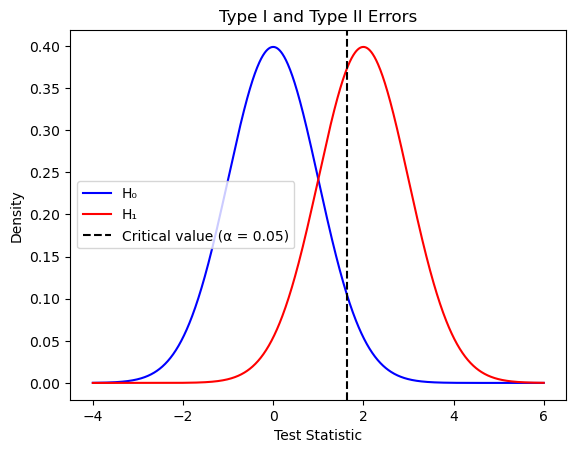

In [17]:
x = np.linspace(-4, 6, 1000)
null = norm(loc=0, scale=1)
alt = norm(loc=2, scale=1)

plt.plot(x, null.pdf(x), label="H₀", color='blue')
plt.plot(x, alt.pdf(x), label="H₁", color='red')
plt.axvline(x=1.64, color='black', linestyle='--', label="Critical value (α = 0.05)")
plt.legend()
plt.title("Type I and Type II Errors")
plt.xlabel("Test Statistic")
plt.ylabel("Density")
plt.show()


In [19]:
# Set random seed for reproducibility
np.random.seed(42)

# Simulated classifier accuracies across 20 runs
# Simulating mean accuracy ~0.54, std ~0.05
accuracies = np.random.normal(loc=0.54, scale=0.05, size=20)

# Hypothesis test: is accuracy significantly > 0.5?
# Perform one-sample t-test
t_stat, p_two_tailed = ttest_1samp(accuracies, popmean=0.5)

# For one-tailed test (right-tail), divide p-value by 2
p_one_tailed = p_two_tailed / 2

# Set significance level
alpha = 0.05

# Print results
print("Mean accuracy:", np.round(np.mean(accuracies), 3))
print("T-statistic:", np.round(t_stat, 3))
print("One-tailed p-value:", np.round(p_one_tailed, 4))

Mean accuracy: 0.531
T-statistic: 2.929
One-tailed p-value: 0.0043


In [20]:
# Decision
if p_one_tailed < alpha:
    print("✅ Reject H₀: Classifier performs significantly better than chance.")
    print("⚠️ Type I error risk: Classifier might actually be random.")
else:
    print("❌ Fail to reject H₀: No evidence it's better than chance.")
    print("⚠️ Type II error risk: Classifier might actually be good but we missed it.")


✅ Reject H₀: Classifier performs significantly better than chance.
⚠️ Type I error risk: Classifier might actually be random.


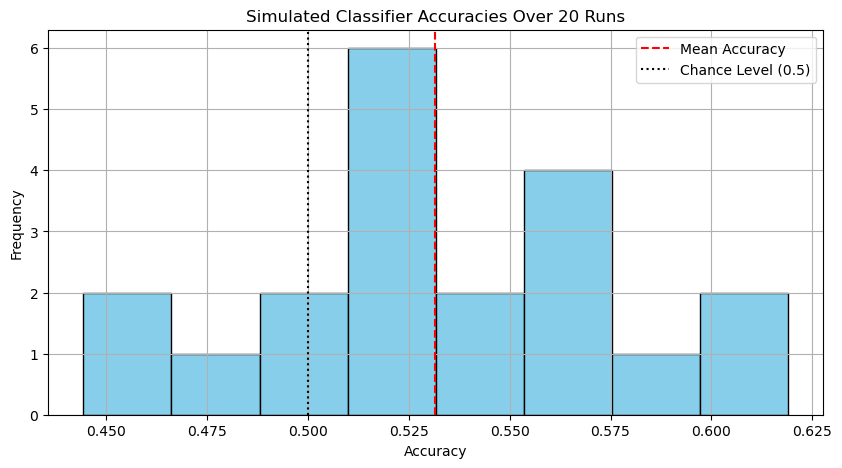

In [21]:
# Plot the accuracies
plt.figure(figsize=(10, 5))
plt.hist(accuracies, bins=8, color="skyblue", edgecolor="black")
plt.axvline(np.mean(accuracies), color='red', linestyle='--', label='Mean Accuracy')
plt.axvline(0.5, color='black', linestyle=':', label='Chance Level (0.5)')
plt.title("Simulated Classifier Accuracies Over 20 Runs")
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()
